# Experiment Analysis Notebook

## Setup

In [181]:
import os
from itertools import combinations

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [182]:
# dracula theme
plt.style.use('dark_background')
colors = ['#ff79c6', '#50fa7b', '#8be9fd', '#bd93f9', '#ff5555', '#f1fa8c']

In [183]:
# home directory
home_dir = os.path.expanduser("~")
home_dir

'/home/luviola'

In [184]:
# base directory
base_dir = os.path.join(home_dir, "buckets", "b1", "expw")
base_dir

'/home/luviola/buckets/b1/expw'

In [185]:
# experiments directory
ninguno_dir = os.path.join(base_dir, "EV-0001", "ganancias_01_007.txt")
rank_simple_dir = os.path.join(base_dir, "EV-0002", "ganancias_01_054.txt")   
rank_cero_fijo_dir = os.path.join(base_dir, "EV-0003", "ganancias_01_071.txt")   
deflacion_dir = os.path.join(base_dir, "EV-0004", "ganancias_01_055.txt")
dolar_blue_dir = os.path.join(base_dir, "EV-0008", "ganancias_01_037.txt")     
dolar_oficial_dir = os.path.join(base_dir, "EV-0006", "ganancias_01_062.txt")
uva_dir = os.path.join(base_dir, "EV-0005", "ganancias_01_049.txt")            
estandarizar_dir = os.path.join(base_dir, "EV-0007", "ganancias_01_044.txt")   

## Helper

In [186]:
def plot_metrics(df, envios_range=(5000, 20000)):
    plt.style.use('dark_background')
    colors = ['#ff79c6', '#50fa7b', '#8be9fd', '#bd93f9', '#ff5555', '#f1fa8c', 
              '#ff5555', '#50fa7b', '#8be9fd', '#bd93f9', '#f1fa8c', '#ff79c6']

    fig, ax = plt.subplots(figsize=(12, 6))

    columns_to_plot = ['gan_sum_1', 'gan_suavizada'] + [f'm_1_{j}' for j in range(1, 11)]

    # Filter the DataFrame for the specified range of envios
    df_filtered = df[(df['envios'] >= envios_range[0]) & (df['envios'] <= envios_range[1])]

    for i, column in enumerate(columns_to_plot):
        if column in df.columns:
            ax.plot(df_filtered['envios'], df_filtered[column], color=colors[i], alpha=0.7, label=column)

    ax.set_xlabel('Envios', fontsize=12, color='#f8f8f2')
    ax.set_ylabel('Values', fontsize=12, color='#f8f8f2')
    ax.tick_params(colors='#f8f8f2')
    ax.grid(color='#44475a', linestyle='--', alpha=0.7)

    # Set x-axis limits
    ax.set_xlim(envios_range)

    # Set y-axis limits based on the filtered data range
    y_min = df_filtered[columns_to_plot].min().min()
    y_max = df_filtered[columns_to_plot].max().max()
    ax.set_ylim(y_min, y_max)

    # Format y-axis ticks to use scientific notation
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2e}'))

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)
    for text in ax.legend().get_texts():
        text.set_color('#f8f8f2')

    plt.tight_layout()
    plt.show()

In [187]:
def analyze_peak_values(df):
    # List of columns to analyze (excluding 'envios')
    columns_to_analyze = ['gan_sum_1', 'gan_suavizada'] + [f'm_1_{i}' for i in range(1, 11)]

    # Create dictionaries to store the peak values and corresponding envios
    peak_values = {}
    peak_envios = {}

    for column in columns_to_analyze:
        # Find the index of the maximum value
        peak_index = df[column].idxmax()
        
        # Store the peak value and corresponding envios
        peak_values[column] = df.loc[peak_index, column]
        peak_envios[column] = df.loc[peak_index, 'envios']

    # Create a DataFrame from the peak values and envios
    peak_df = pd.DataFrame({
        'Peak Value': peak_values,
        'Peak Envios': peak_envios
    })

    # Sort the DataFrame by peak value in descending order
    peak_df = peak_df.sort_values('Peak Value', ascending=False)

    return peak_df

## Ninguno

In [188]:
ninguno_df = pd.read_csv(ninguno_dir, sep='\t')
ninguno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [189]:
ninguno_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.112364e+08,-1.112529e+08,-1.113077e+08,-1.112324e+08,-1.112477e+08,-1.114523e+08,-1.111598e+08,-1.113262e+08,-1.108807e+08,-1.110551e+08,-1.114496e+08,-1.105548e+08
std,47514.916791,1.263017e+08,1.263152e+08,1.260524e+08,1.262748e+08,1.261248e+08,1.262135e+08,1.263765e+08,1.262849e+08,1.266410e+08,1.264426e+08,1.262994e+08,1.254130e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410280e+08
25%,41149.750000,-2.215778e+08,-2.213018e+08,-2.214218e+08,-2.217818e+08,-2.213018e+08,-2.216340e+08,-2.215418e+08,-2.217818e+08,-2.214218e+08,-2.216618e+08,-2.219018e+08,-2.200889e+08
50%,82298.500000,-1.011075e+08,-1.012155e+08,-1.003680e+08,-1.007355e+08,-1.012155e+08,-1.013355e+08,-1.012155e+08,-1.008555e+08,-1.013355e+08,-1.009755e+08,-1.018155e+08,-1.010908e+08
75%,123447.250000,9.558750e+06,9.402750e+06,9.249750e+06,1.029675e+07,8.184750e+06,8.991000e+06,9.768750e+06,1.002975e+07,1.015875e+07,1.018500e+07,9.090750e+06,1.004438e+07
max,164596.000000,6.072000e+07,6.147300e+07,6.160200e+07,6.020400e+07,6.163800e+07,6.163500e+07,6.127200e+07,6.165600e+07,6.224100e+07,6.152400e+07,6.166200e+07,6.056804e+07


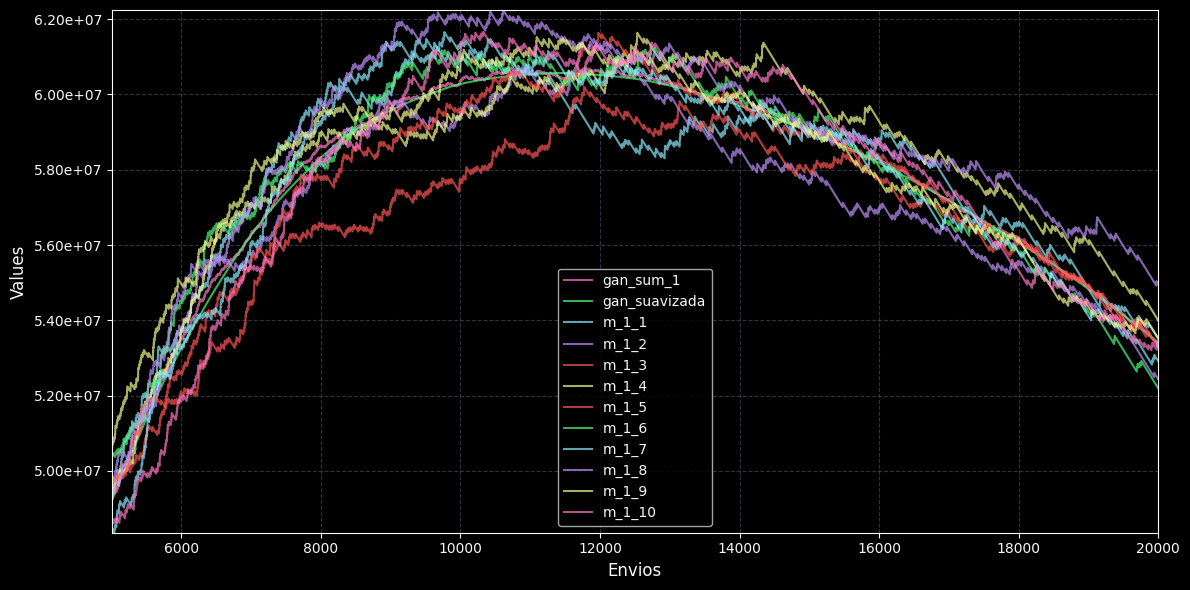

In [190]:
ninguno_plot = plot_metrics(ninguno_df)
ninguno_plot

In [191]:
ninguno_peak_df = analyze_peak_values(ninguno_df)
ninguno_peak_df

,Peak Value,Peak Envios
m_1_8,6.224100e+07,10613
m_1_10,6.166200e+07,10326
m_1_7,6.165600e+07,9768
m_1_4,6.163800e+07,12534
m_1_5,6.163500e+07,11975
m_1_2,6.160200e+07,11826
m_1_9,6.152400e+07,11092
m_1_1,6.147300e+07,9509
m_1_6,6.127200e+07,12736
gan_sum_1,6.072000e+07,10720


## Rank Simple

In [192]:
rank_simple_df = pd.read_csv(rank_simple_dir, sep='\t')
rank_simple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [193]:
rank_simple_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.114587e+08,-1.114096e+08,-1.115245e+08,-1.113850e+08,-1.115399e+08,-1.114194e+08,-1.113885e+08,-1.114508e+08,-1.115974e+08,-1.114287e+08,-1.114430e+08,-1.107773e+08
std,47514.916791,1.261787e+08,1.262223e+08,1.261496e+08,1.261923e+08,1.262130e+08,1.262214e+08,1.261521e+08,1.261248e+08,1.261263e+08,1.262398e+08,1.261493e+08,1.252913e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410280e+08
25%,41149.750000,-2.212418e+08,-2.211818e+08,-2.213018e+08,-2.211818e+08,-2.213018e+08,-2.213018e+08,-2.211818e+08,-2.213018e+08,-2.213018e+08,-2.211818e+08,-2.211818e+08,-2.197539e+08
50%,82298.500000,-1.022955e+08,-1.025355e+08,-1.026555e+08,-1.018155e+08,-1.024155e+08,-1.020555e+08,-1.019355e+08,-1.020555e+08,-1.025355e+08,-1.026555e+08,-1.022955e+08,-1.023095e+08
75%,123447.250000,9.666750e+06,9.363750e+06,9.270750e+06,9.552750e+06,9.789750e+06,9.819000e+06,9.906000e+06,1.000275e+07,9.618750e+06,9.807750e+06,9.474750e+06,1.029499e+07
max,164596.000000,6.101100e+07,6.163500e+07,6.137400e+07,6.120300e+07,6.099000e+07,6.187500e+07,6.114600e+07,6.111600e+07,6.131100e+07,6.245400e+07,6.135000e+07,6.075448e+07


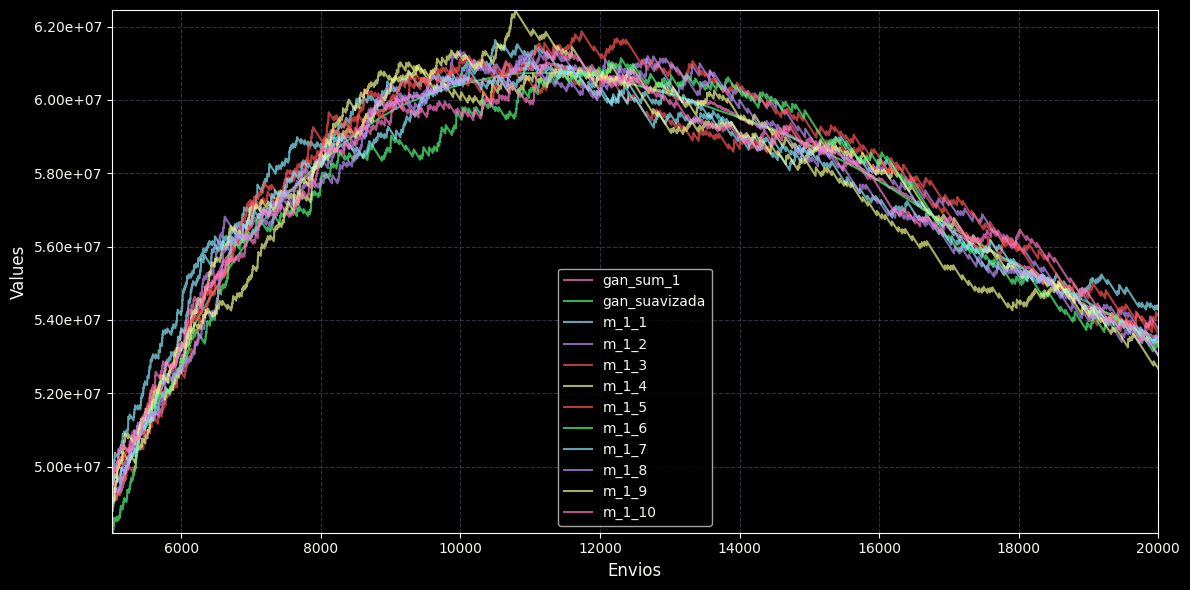

In [194]:
rank_simple_plot = plot_metrics(rank_simple_df)
rank_simple_plot

In [195]:
rank_simple_peak_df = analyze_peak_values(rank_simple_df)
rank_simple_peak_df

,Peak Value,Peak Envios
m_1_9,6.245400e+07,10782
m_1_5,6.187500e+07,11735
m_1_1,6.163500e+07,10495
m_1_2,6.137400e+07,11342
m_1_10,6.135000e+07,11390
m_1_8,6.131100e+07,10963
m_1_3,6.120300e+07,10119
m_1_6,6.114600e+07,12298
m_1_7,6.111600e+07,10988
gan_sum_1,6.101100e+07,11243


## Rank Zero Fijo

In [196]:
rank_cero_fijo_df = pd.read_csv(rank_cero_fijo_dir, sep='\t')
rank_cero_fijo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [197]:
rank_cero_fijo_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.123744e+08,-1.127849e+08,-1.126228e+08,-1.122892e+08,-1.123965e+08,-1.119451e+08,-1.125891e+08,-1.124211e+08,-1.119799e+08,-1.126005e+08,-1.121147e+08,-1.117050e+08
std,47514.916791,1.253165e+08,1.249456e+08,1.252073e+08,1.255700e+08,1.251021e+08,1.256323e+08,1.252167e+08,1.253232e+08,1.256234e+08,1.250374e+08,1.255236e+08,1.244174e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410408e+08
25%,41149.750000,-2.219018e+08,-2.219018e+08,-2.223818e+08,-2.219018e+08,-2.217818e+08,-2.216618e+08,-2.219018e+08,-2.221418e+08,-2.217818e+08,-2.218320e+08,-2.218088e+08,-2.204325e+08
50%,82298.500000,-1.017075e+08,-1.019355e+08,-1.021755e+08,-1.018170e+08,-1.009755e+08,-1.018155e+08,-1.019355e+08,-1.016565e+08,-1.014555e+08,-1.019355e+08,-1.013355e+08,-1.017032e+08
75%,123447.250000,8.148000e+06,7.302750e+06,8.796750e+06,7.476750e+06,7.602750e+06,8.355000e+06,8.832750e+06,7.551750e+06,8.988750e+06,8.061750e+06,8.358750e+06,8.429365e+06
max,164596.000000,5.671800e+07,5.620500e+07,5.556600e+07,5.858400e+07,5.831700e+07,5.977800e+07,5.526300e+07,5.772000e+07,5.788500e+07,5.527800e+07,5.921400e+07,5.660183e+07


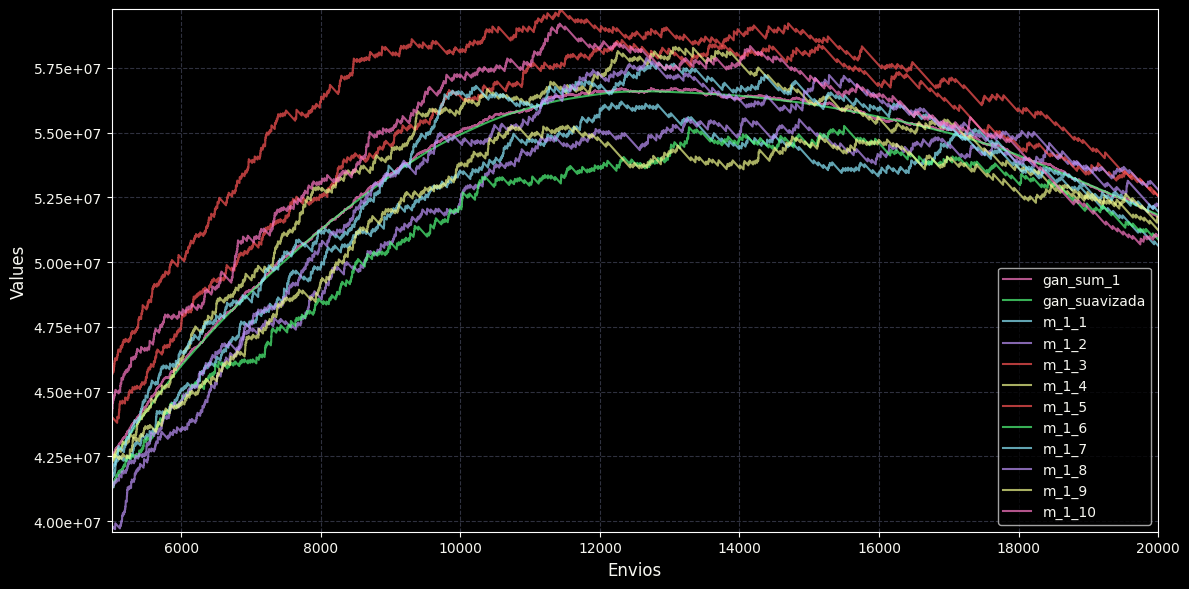

In [198]:
rank_cero_fijo_plot = plot_metrics(rank_cero_fijo_df)
rank_cero_fijo_plot

In [199]:
rank_cero_fijo_peak_df = analyze_peak_values(rank_cero_fijo_df)
rank_cero_fijo_peak_df

,Peak Value,Peak Envios
m_1_5,5.977800e+07,11434
m_1_10,5.921400e+07,11422
m_1_3,5.858400e+07,12312
m_1_4,5.831700e+07,13081
m_1_8,5.788500e+07,12665
m_1_7,5.772000e+07,12840
gan_sum_1,5.671800e+07,12734
gan_suavizada,5.660183e+07,12707
m_1_1,5.620500e+07,12305
m_1_2,5.556600e+07,13238


## Deflacion

In [200]:
deflacion_df = pd.read_csv(deflacion_dir, sep='\t')
deflacion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [201]:
deflacion_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.111140e+08,-1.111390e+08,-1.110965e+08,-1.110702e+08,-1.112920e+08,-1.112275e+08,-1.111127e+08,-1.109351e+08,-1.110705e+08,-1.112591e+08,-1.109374e+08,-1.104289e+08
std,47514.916791,1.263760e+08,1.263813e+08,1.263554e+08,1.264632e+08,1.263004e+08,1.262834e+08,1.263502e+08,1.264986e+08,1.264124e+08,1.263804e+08,1.263401e+08,1.254901e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410431e+08
25%,41149.750000,-2.216138e+08,-2.215418e+08,-2.216618e+08,-2.214218e+08,-2.220218e+08,-2.217818e+08,-2.215418e+08,-2.214218e+08,-2.215418e+08,-2.219018e+08,-2.213018e+08,-2.201524e+08
50%,82298.500000,-1.009035e+08,-1.010955e+08,-1.009755e+08,-1.004955e+08,-1.013025e+08,-1.003755e+08,-1.012155e+08,-1.013355e+08,-1.006155e+08,-1.010955e+08,-1.004955e+08,-1.008774e+08
75%,123447.250000,1.035975e+07,1.076175e+07,9.759750e+06,1.029375e+07,1.047300e+07,1.029000e+07,1.010175e+07,1.071375e+07,1.058175e+07,1.045575e+07,1.013475e+07,1.115689e+07
max,164596.000000,6.031500e+07,6.151500e+07,5.937600e+07,6.220500e+07,6.048300e+07,5.989500e+07,6.125100e+07,6.081000e+07,6.126600e+07,6.090600e+07,6.010200e+07,6.013637e+07


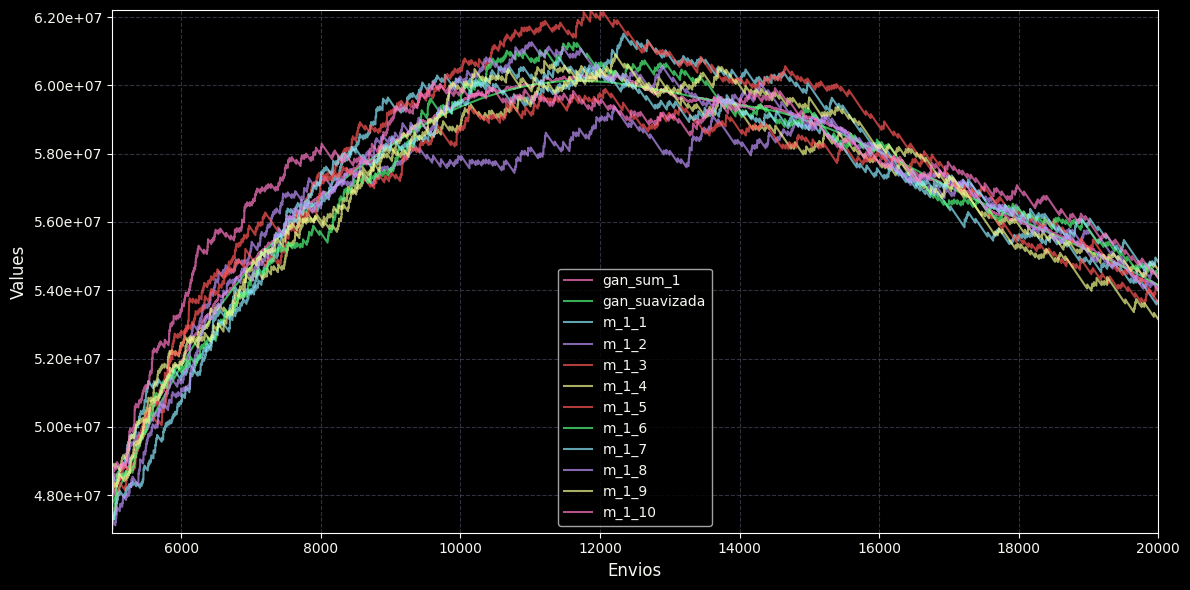

In [202]:
deflacion_plot = plot_metrics(deflacion_df)
deflacion_plot

In [203]:
deflacion_peak_df = analyze_peak_values(deflacion_df)
deflacion_peak_df

,Peak Value,Peak Envios
m_1_3,6.220500e+07,11865
m_1_1,6.151500e+07,12335
m_1_8,6.126600e+07,11018
m_1_6,6.125100e+07,11623
m_1_9,6.090600e+07,12218
m_1_7,6.081000e+07,11410
m_1_4,6.048300e+07,11999
gan_sum_1,6.031500e+07,12007
gan_suavizada,6.013637e+07,11652
m_1_10,6.010200e+07,9606


## Dolar Blue

In [204]:
dolar_blue_df = pd.read_csv(dolar_blue_dir, sep='\t')
dolar_blue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [205]:
dolar_blue_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.108247e+08,-1.107900e+08,-1.106736e+08,-1.108130e+08,-1.109491e+08,-1.108004e+08,-1.109484e+08,-1.108036e+08,-1.108278e+08,-1.107511e+08,-1.108902e+08,-1.101375e+08
std,47514.916791,1.264157e+08,1.264632e+08,1.265112e+08,1.265401e+08,1.263986e+08,1.264200e+08,1.262374e+08,1.263854e+08,1.264207e+08,1.264660e+08,1.263174e+08,1.255275e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410280e+08
25%,41149.750000,-2.212418e+08,-2.213018e+08,-2.211818e+08,-2.214218e+08,-2.213018e+08,-2.210618e+08,-2.211818e+08,-2.211818e+08,-2.211818e+08,-2.213018e+08,-2.213018e+08,-2.197679e+08
50%,82298.500000,-1.005435e+08,-1.006155e+08,-1.004955e+08,-1.010955e+08,-1.003755e+08,-1.006155e+08,-1.003755e+08,-1.002555e+08,-1.003755e+08,-1.004955e+08,-1.007355e+08,-1.005482e+08
75%,123447.250000,1.060875e+07,1.080975e+07,1.094700e+07,1.109475e+07,9.729000e+06,1.059675e+07,1.043475e+07,1.019700e+07,1.045275e+07,1.114875e+07,1.049400e+07,1.122669e+07
max,164596.000000,6.122400e+07,6.188700e+07,6.175500e+07,6.181500e+07,6.264600e+07,6.206700e+07,6.146700e+07,6.133500e+07,6.185700e+07,6.118200e+07,6.076200e+07,6.103407e+07


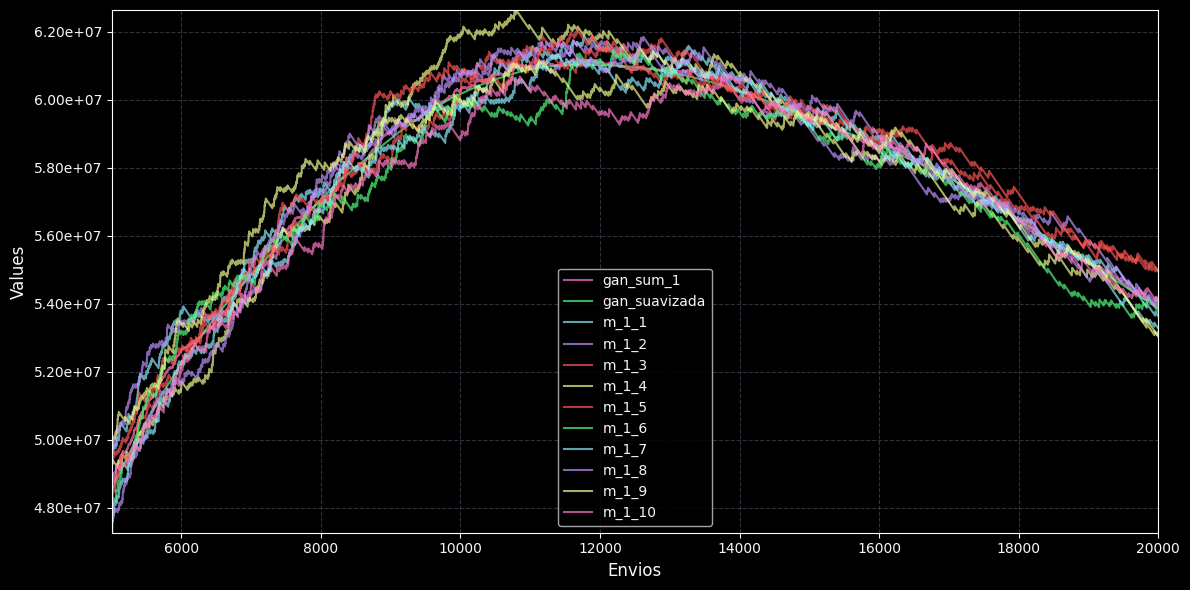

In [206]:
dolar_blue_plot = plot_metrics(dolar_blue_df)
dolar_blue_plot

In [207]:
dolar_blue_peak_df = analyze_peak_values(dolar_blue_df)
dolar_blue_peak_df

,Peak Value,Peak Envios
m_1_4,6.264600e+07,10798
m_1_5,6.206700e+07,11671
m_1_1,6.188700e+07,11771
m_1_8,6.185700e+07,12621
m_1_3,6.181500e+07,12875
m_1_2,6.175500e+07,11615
m_1_6,6.146700e+07,12191
m_1_7,6.133500e+07,11395
gan_sum_1,6.122400e+07,11680
m_1_9,6.118200e+07,11126


## Dolar Oficial

In [208]:
dolar_oficial_df = pd.read_csv(dolar_oficial_dir, sep='\t')
dolar_oficial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [209]:
dolar_oficial_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.110432e+08,-1.111258e+08,-1.109553e+08,-1.110564e+08,-1.111470e+08,-1.111379e+08,-1.111598e+08,-1.109091e+08,-1.109506e+08,-1.110252e+08,-1.109655e+08,-1.103595e+08
std,47514.916791,1.265813e+08,1.264809e+08,1.266604e+08,1.265211e+08,1.265237e+08,1.265407e+08,1.264856e+08,1.266298e+08,1.267255e+08,1.265545e+08,1.266954e+08,1.256968e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410302e+08
25%,41149.750000,-2.216550e+08,-2.216618e+08,-2.214810e+08,-2.216618e+08,-2.216618e+08,-2.219018e+08,-2.215418e+08,-2.215418e+08,-2.216618e+08,-2.216618e+08,-2.217818e+08,-2.201958e+08
50%,82298.500000,-1.016235e+08,-1.019355e+08,-1.014555e+08,-1.014555e+08,-1.018155e+08,-1.015755e+08,-1.016955e+08,-1.015755e+08,-1.013355e+08,-1.016955e+08,-1.016955e+08,-1.016160e+08
75%,123447.250000,1.036275e+07,9.657750e+06,1.054875e+07,1.076700e+07,1.021275e+07,1.059675e+07,9.804750e+06,1.025175e+07,1.067775e+07,1.010175e+07,1.107000e+07,1.106268e+07
max,164596.000000,6.128100e+07,6.120900e+07,6.235200e+07,6.133800e+07,6.227400e+07,6.101400e+07,6.132900e+07,6.311100e+07,6.182400e+07,6.155100e+07,6.218100e+07,6.111269e+07


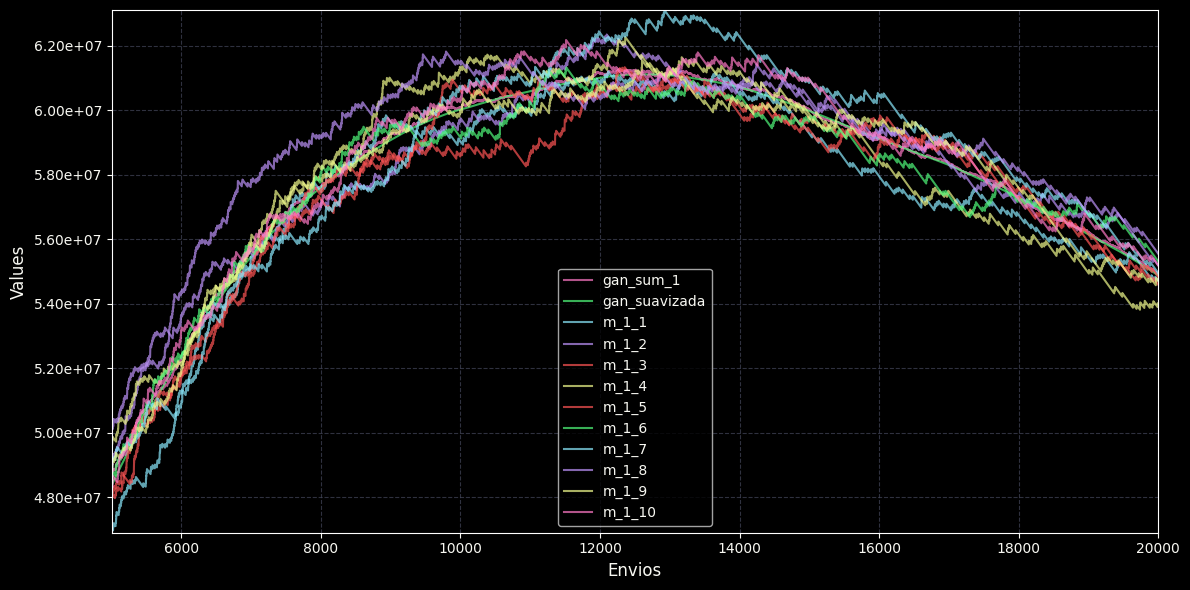

In [210]:
dolar_oficial_plot = plot_metrics(dolar_oficial_df)
dolar_oficial_plot

In [211]:
dolar_oficial_peak_df = analyze_peak_values(dolar_oficial_df)
dolar_oficial_peak_df

,Peak Value,Peak Envios
m_1_7,6.311100e+07,12923
m_1_2,6.235200e+07,12096
m_1_4,6.227400e+07,12362
m_1_10,6.218100e+07,11513
m_1_8,6.182400e+07,9792
m_1_9,6.155100e+07,12603
m_1_3,6.133800e+07,12354
m_1_6,6.132900e+07,11517
gan_sum_1,6.128100e+07,12285
m_1_1,6.120900e+07,12117


## UVA

In [212]:
uva_df = pd.read_csv(uva_dir, sep='\t')
uva_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [213]:
uva_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.108307e+08,-1.109062e+08,-1.108549e+08,-1.109428e+08,-1.107439e+08,-1.108200e+08,-1.108704e+08,-1.108311e+08,-1.108008e+08,-1.108228e+08,-1.107137e+08,-1.101427e+08
std,47514.916791,1.265511e+08,1.265555e+08,1.265482e+08,1.264083e+08,1.267011e+08,1.265411e+08,1.264722e+08,1.266084e+08,1.265364e+08,1.265054e+08,1.266381e+08,1.256657e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440400e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410723e+08
25%,41149.750000,-2.215178e+08,-2.217818e+08,-2.216618e+08,-2.215418e+08,-2.216618e+08,-2.214218e+08,-2.215418e+08,-2.213018e+08,-2.214218e+08,-2.214218e+08,-2.214218e+08,-2.200419e+08
50%,82298.500000,-1.005795e+08,-1.009755e+08,-1.007355e+08,-1.008555e+08,-1.004955e+08,-1.004955e+08,-1.003755e+08,-1.006155e+08,-1.006155e+08,-9.989550e+07,-1.007355e+08,-1.005599e+08
75%,123447.250000,1.095300e+07,1.093875e+07,1.085475e+07,1.045200e+07,1.067475e+07,1.110600e+07,1.105200e+07,1.098375e+07,1.103475e+07,1.129875e+07,1.130700e+07,1.182433e+07
max,164596.000000,6.076800e+07,6.143100e+07,6.171000e+07,6.115800e+07,6.192300e+07,6.103800e+07,6.055800e+07,6.142800e+07,6.085800e+07,6.129000e+07,6.096600e+07,6.053806e+07


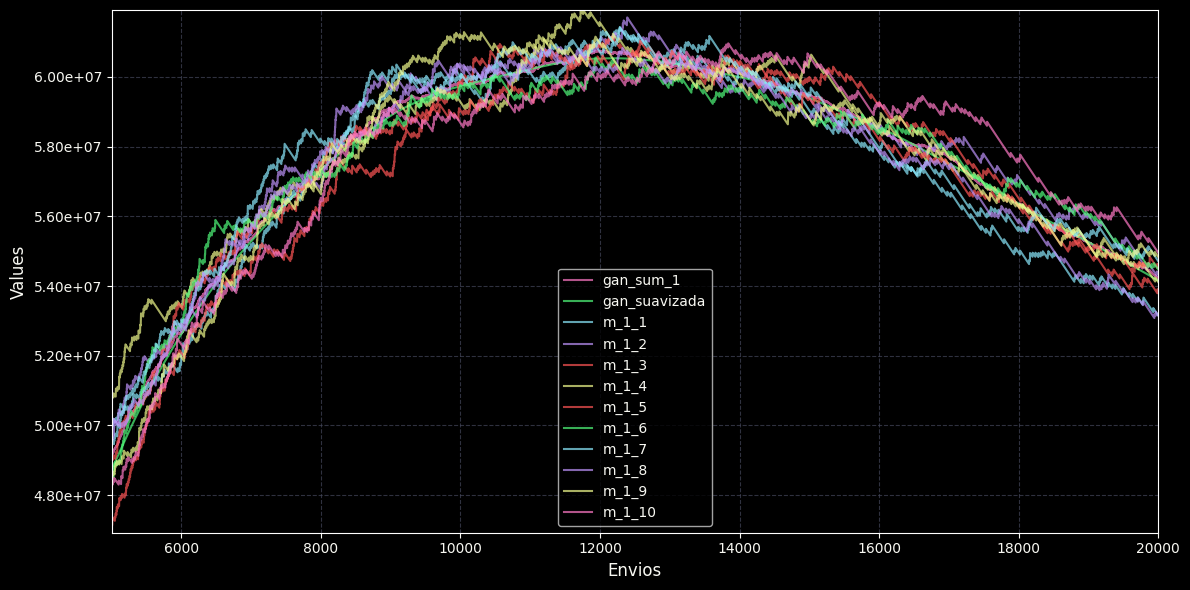

In [214]:
uva_plot = plot_metrics(uva_df)
uva_plot

In [215]:
uva_peak_df = analyze_peak_values(uva_df)
uva_df

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
0,1,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,-3000.0,NaN
1,2,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,-6000.0,NaN
2,3,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,NaN
3,4,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,-12000.0,NaN
4,5,-3000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,-15000.0,105000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164591,164592,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,-344016000.0,NaN
164592,164593,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,-344019000.0,NaN
164593,164594,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,-344022000.0,NaN
164594,164595,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,-344025000.0,NaN


## Estandarizar

In [216]:
estandarizar_df = pd.read_csv(estandarizar_dir, sep='\t')
estandarizar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164596 entries, 0 to 164595
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   envios         164596 non-null  int64  
 1   gan_sum_1      164596 non-null  float64
 2   m_1_1          164596 non-null  float64
 3   m_1_2          164596 non-null  float64
 4   m_1_3          164596 non-null  float64
 5   m_1_4          164596 non-null  float64
 6   m_1_5          164596 non-null  float64
 7   m_1_6          164596 non-null  float64
 8   m_1_7          164596 non-null  float64
 9   m_1_8          164596 non-null  float64
 10  m_1_9          164596 non-null  float64
 11  m_1_10         164596 non-null  float64
 12  gan_suavizada  162596 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 16.3 MB


In [217]:
estandarizar_df.describe()

,envios,gan_sum_1,m_1_1,m_1_2,m_1_3,m_1_4,m_1_5,m_1_6,m_1_7,m_1_8,m_1_9,m_1_10,gan_suavizada
count,164596.000000,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.645960e+05,1.625960e+05
mean,82298.500000,-1.120367e+08,-1.120898e+08,-1.121421e+08,-1.119643e+08,-1.117883e+08,-1.120844e+08,-1.121765e+08,-1.120653e+08,-1.120525e+08,-1.118448e+08,-1.121587e+08,-1.113636e+08
std,47514.916791,1.254234e+08,1.254242e+08,1.252544e+08,1.254812e+08,1.256159e+08,1.254996e+08,1.252427e+08,1.253619e+08,1.253969e+08,1.255048e+08,1.254566e+08,1.245243e+08
min,1.000000,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.440280e+08,-3.410280e+08
25%,41149.750000,-2.215418e+08,-2.219018e+08,-2.214218e+08,-2.216618e+08,-2.214218e+08,-2.214218e+08,-2.216618e+08,-2.214218e+08,-2.216618e+08,-2.214218e+08,-2.214218e+08,-2.200679e+08
50%,82298.500000,-1.013955e+08,-1.016955e+08,-1.016955e+08,-1.010625e+08,-1.012155e+08,-1.019355e+08,-1.013355e+08,-1.010955e+08,-1.013355e+08,-1.013355e+08,-1.012155e+08,-1.013762e+08
75%,123447.250000,9.033750e+06,9.039000e+06,9.171750e+06,8.796750e+06,9.039000e+06,8.658750e+06,9.255750e+06,9.486750e+06,8.358750e+06,9.111000e+06,9.363750e+06,9.420751e+06
max,164596.000000,5.659200e+07,5.665200e+07,5.640300e+07,5.707500e+07,5.787900e+07,5.713500e+07,5.671500e+07,5.744100e+07,5.676000e+07,5.712600e+07,5.814600e+07,5.644310e+07


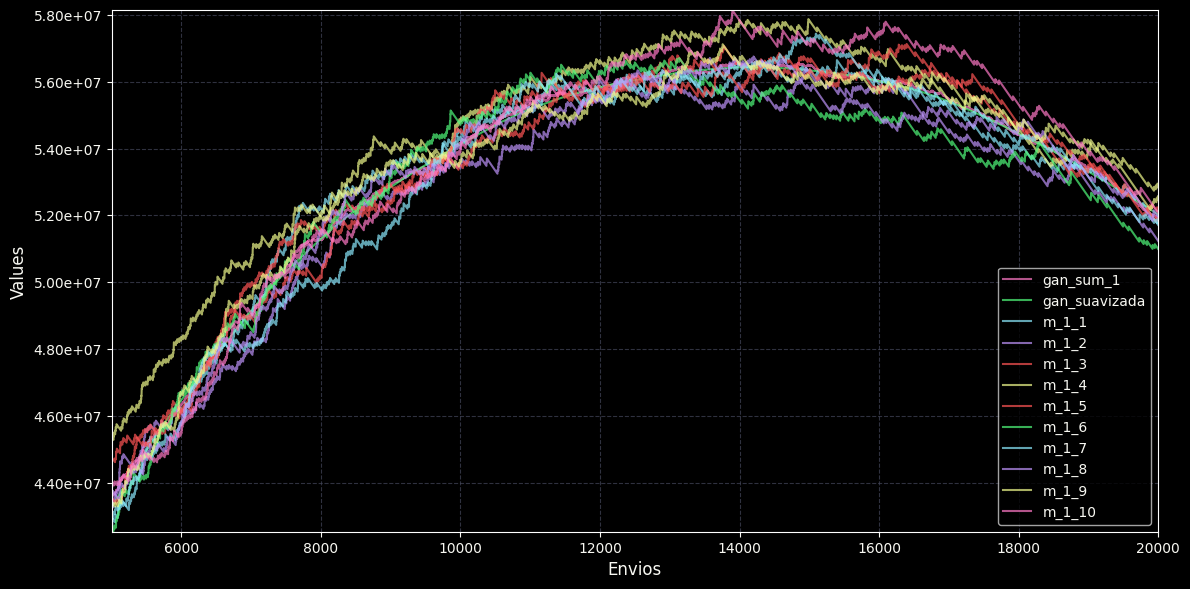

In [218]:
estandarizar_plot = plot_metrics(estandarizar_df)
estandarizar_plot

In [219]:
estandarizar_peak_df = analyze_peak_values(estandarizar_df)
estandarizar_peak_df

,Peak Value,Peak Envios
m_1_10,5.814600e+07,13898
m_1_4,5.787900e+07,14987
m_1_7,5.744100e+07,15093
m_1_5,5.713500e+07,16395
m_1_9,5.712600e+07,13758
m_1_3,5.707500e+07,13775
m_1_8,5.676000e+07,14200
m_1_6,5.671500e+07,13135
m_1_1,5.665200e+07,15396
gan_sum_1,5.659200e+07,14320


## Summary Table

In [220]:
def create_summary_table(dataframes, envios_range=(9000, 13000), sample_size=20):
    summary_data = {}
    
    for name, df in dataframes.items():
        filtered_df = df[(df['envios'] >= envios_range[0]) & (df['envios'] <= envios_range[1])]
        sample = filtered_df['gan_suavizada'].sample(sample_size, random_state=42)  # for reproducibility
        summary_data[name] = {
            f'Sample {i+1}': value for i, value in enumerate(sample)
        }
        summary_data[name]['Random Sample Statistics:'] = '---'  # Add a divider row
        summary_data[name]['Mean'] = filtered_df['gan_suavizada'].mean()
        summary_data[name]['Std Dev'] = filtered_df['gan_suavizada'].std()
        summary_data[name]['Method Maximum:'] = '---'  # Add another divider row
        summary_data[name]['Max'] = filtered_df['gan_suavizada'].max()  # Add max value
    
    summary_df = pd.DataFrame(summary_data)
    
    # Format the numeric values and add emphasis to mean, std dev, and max
    for col in summary_df.columns:
        summary_df[col] = summary_df[col].apply(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)
        summary_df.loc['Mean', col] = f"{summary_df.loc['Mean', col]}"
        summary_df.loc['Std Dev', col] = f"{summary_df.loc['Std Dev', col]}"
        summary_df.loc['Max', col] = f"{summary_df.loc['Max', col]}"
    
    # Generate the table
    table = tabulate(summary_df, headers='keys', tablefmt='pipe')
    
    return table

In [221]:
dataframes = {
    'ninguno': ninguno_df,
    'rank_simple_df': rank_simple_df,
    'rank_cero_fijo': rank_cero_fijo_df,
    'deflacion': deflacion_df,
    'dolar_blue': dolar_blue_df,
    'dolar_oficial': dolar_oficial_df,
    'uva': uva_df,            
    'estandarizar': estandarizar_df
}

In [222]:
summary_table = create_summary_table(dataframes)
print(summary_table)

|                           | ninguno       | rank_simple_df   | rank_cero_fijo   | deflacion     | dolar_blue    | dolar_oficial   | uva           | estandarizar   |
|:--------------------------|:--------------|:-----------------|:-----------------|:--------------|:--------------|:----------------|:--------------|:---------------|
| Sample 1                  | 60,004,373.31 | 60,156,193.40    | 54,311,191.90    | 58,928,835.08 | 59,664,967.02 | 59,683,599.70   | 59,443,161.92 | 53,579,065.97  |
| Sample 2                  | 60,545,683.66 | 60,709,179.91    | 56,414,997.00    | 60,129,257.87 | 61,033,479.76 | 60,943,524.74   | 60,507,188.91 | 55,733,749.63  |
| Sample 3                  | 59,984,565.22 | 60,135,941.53    | 54,266,232.38    | 58,898,562.22 | 59,627,923.54 | 59,658,286.36   | 59,419,185.91 | 53,544,055.47  |
| Sample 4                  | 60,287,077.96 | 60,230,976.01    | 56,591,683.66    | 59,863,455.77 | 60,865,488.76 | 61,106,880.06   | 60,445,866.57 | 56,189,812.59  

## Test Helpers

In [239]:
def wilcoxon_test(df1, df2, column='gan_suavizada', envios_range=(5000, 20000)):
    """Perform Wilcoxon signed-rank test between two DataFrames within specified envios range."""
    df1_filtered = df1[(df1['envios'] >= envios_range[0]) & (df1['envios'] <= envios_range[1])]
    df2_filtered = df2[(df2['envios'] >= envios_range[0]) & (df2['envios'] <= envios_range[1])]
    
    merged = pd.merge(df1_filtered[['envios', column]], df2_filtered[['envios', column]], on='envios', suffixes=('_1', '_2'))
    
    if len(merged) < 2:
        return np.nan, np.nan  # Not enough data for the test
    
    differences = merged[f'{column}_1'] - merged[f'{column}_2']
    non_zero_diff = differences[differences != 0]
    
    if len(non_zero_diff) < 2:
        return 0, 1  # No difference or not enough non-zero differences
    
    statistic, p_value = stats.wilcoxon(non_zero_diff)
    return statistic, p_value

In [240]:
def paired_ttest(df1, df2, column='gan_suavizada', envios_range=(5000, 20000)):
    """Perform paired t-test between two DataFrames within specified envios range."""
    df1_filtered = df1[(df1['envios'] >= envios_range[0]) & (df1['envios'] <= envios_range[1])]
    df2_filtered = df2[(df2['envios'] >= envios_range[0]) & (df2['envios'] <= envios_range[1])]
    
    merged = pd.merge(df1_filtered[['envios', column]], df2_filtered[['envios', column]], on='envios', suffixes=('_1', '_2'))
    
    if len(merged) < 2:
        return np.nan, np.nan  # Not enough data for the test
    
    statistic, p_value = stats.ttest_rel(merged[f'{column}_1'], merged[f'{column}_2'])
    return statistic, p_value

In [241]:
def compare_dataframes(dataframes, test_func, alpha=0.05, envios_range=(5000, 20000)):
    """Compare all pairs of DataFrames using specified test function within specified envios range."""
    results = []
    for (name1, df1), (name2, df2) in combinations(dataframes.items(), 2):
        statistic, p_value = test_func(df1, df2, envios_range=envios_range)
        if np.isnan(statistic) or np.isnan(p_value):
            better = 'Insufficient data'
            significant = False
        else:
            better = name1 if statistic > 0 else name2
            significant = p_value < alpha
        results.append({
            'df1': name1,
            'df2': name2,
            'statistic': statistic,
            'p_value': p_value,
            'better': better if significant else 'No significant difference',
            'significant': significant
        })
    return pd.DataFrame(results)

In [257]:
def detailed_wilcoxon_test(df1, df2, column='gan_suavizada', envios_range=(10000, 14000)):
    """Perform Wilcoxon signed-rank test with detailed statistics."""
    df1_filtered = df1[(df1['envios'] >= envios_range[0]) & (df1['envios'] <= envios_range[1])]
    df2_filtered = df2[(df2['envios'] >= envios_range[0]) & (df2['envios'] <= envios_range[1])]
    merged = pd.merge(df1_filtered[['envios', column]], df2_filtered[['envios', column]], on='envios', suffixes=('_1', '_2'))
    
    differences = merged[f'{column}_1'] - merged[f'{column}_2']
    non_zero_diff = differences[differences != 0]
    
    results = {
        'total_samples': len(merged),
        'non_zero_differences': len(non_zero_diff),
        'positive_differences': sum(differences > 0),
        'negative_differences': sum(differences < 0),
        'zero_differences': sum(differences == 0),
        'min_difference': differences.min(),
        'max_difference': differences.max(),
    }
    
    if len(non_zero_diff) >= 2:
        statistic, p_value = stats.wilcoxon(non_zero_diff)
        results['statistic'] = statistic
        results['p_value'] = p_value
    else:
        results['statistic'] = np.nan
        results['p_value'] = np.nan
    
    return results

In [258]:
def compare_dataframes_detailed(dataframes, envios_range=(10000, 14000)):
    """Compare all pairs of DataFrames using the detailed Wilcoxon test."""
    results = []
    for (name1, df1), (name2, df2) in combinations(dataframes.items(), 2):
        comparison_results = detailed_wilcoxon_test(df1, df2, envios_range=envios_range)
        comparison_results['df1'] = name1
        comparison_results['df2'] = name2
        results.append(comparison_results)
    return pd.DataFrame(results)

## Wilcoxon Test Comparisons

In [242]:
wilcoxon_results = compare_dataframes(dataframes, wilcoxon_test)
wilcoxon_results

,df1,df2,statistic,p_value,better,significant
0,ninguno,rank_simple_df,26203613.0,0.000000e+00,ninguno,True
1,ninguno,rank_cero_fijo,0.0,0.000000e+00,rank_cero_fijo,True
2,ninguno,deflacion,11122452.0,0.000000e+00,ninguno,True
3,ninguno,dolar_blue,56003412.5,6.268884e-01,No significant difference,False
4,ninguno,dolar_oficial,25781930.0,0.000000e+00,ninguno,True
5,ninguno,uva,41884713.5,8.692583e-162,ninguno,True
6,ninguno,estandarizar,0.0,0.000000e+00,estandarizar,True
7,rank_simple_df,rank_cero_fijo,0.0,0.000000e+00,rank_cero_fijo,True
8,rank_simple_df,deflacion,27307063.5,0.000000e+00,rank_simple_df,True
9,rank_simple_df,dolar_blue,49413149.0,3.903660e-38,rank_simple_df,True


In [243]:
wilcoxon_win_counts = wilcoxon_results[wilcoxon_results['significant']]['better'].value_counts()
wilcoxon_win_counts

better
estandarizar      6
ninguno           4
rank_simple_df    4
rank_cero_fijo    3
dolar_blue        3
dolar_oficial     3
deflacion         2
uva               2
Name: count, dtype: int64

In [244]:
wilcoxon_best_df = wilcoxon_win_counts.index[0] if not wilcoxon_win_counts.empty else "No clear winner"
wilcoxon_best_df

'estandarizar'

In [245]:
if wilcoxon_best_df != "No clear winner":
    print(f"\nPairwise comparisons for {wilcoxon_best_df} (Wilcoxon):")
    best_df_comparisons = wilcoxon_results[
        (wilcoxon_results['df1'] == wilcoxon_best_df) | (wilcoxon_results['df2'] == wilcoxon_best_df)
    ]
    print(best_df_comparisons[['df1', 'df2', 'better', 'p_value']])


Pairwise comparisons for estandarizar (Wilcoxon):
               df1           df2          better   p_value
6          ninguno  estandarizar    estandarizar  0.000000
12  rank_simple_df  estandarizar    estandarizar  0.000000
17  rank_cero_fijo  estandarizar  rank_cero_fijo  0.021056
21       deflacion  estandarizar    estandarizar  0.000000
24      dolar_blue  estandarizar    estandarizar  0.000000
26   dolar_oficial  estandarizar    estandarizar  0.000000
27             uva  estandarizar    estandarizar  0.000000


In [259]:
detailed_results = compare_dataframes_detailed(dataframes)
detailed_results

,total_samples,non_zero_differences,positive_differences,negative_differences,zero_differences,min_difference,max_difference,statistic,p_value,df1,df2
0,4001,4001,1521,2480,0,-2.188066e+05,1.834903e+05,1959699.0,4.539573e-172,ninguno,rank_simple_df
1,4001,4001,4001,0,0,3.273151e+06,5.344288e+06,0.0,0.000000e+00,ninguno,rank_cero_fijo
2,4001,4001,4001,0,0,2.733733e+05,9.038621e+05,0.0,0.000000e+00,ninguno,deflacion
3,4001,4001,189,3812,0,-5.874603e+05,1.004858e+05,35973.0,0.000000e+00,ninguno,dolar_blue
4,4001,4001,825,3176,0,-1.019142e+06,2.515442e+05,636716.0,0.000000e+00,ninguno,dolar_oficial
5,4001,4001,1927,2074,0,-2.960420e+05,5.387826e+05,3169519.0,3.880357e-30,ninguno,uva
6,4001,4001,4001,0,0,3.263676e+06,6.150291e+06,0.0,0.000000e+00,ninguno,estandarizar
7,4001,4001,4001,0,0,3.089661e+06,5.482351e+06,0.0,0.000000e+00,rank_simple_df,rank_cero_fijo
8,4001,4001,4001,0,0,8.988306e+04,1.041925e+06,0.0,0.000000e+00,rank_simple_df,deflacion
9,4001,4001,593,3408,0,-7.533613e+05,2.385487e+05,348248.5,0.000000e+00,rank_simple_df,dolar_blue


# Paired T-Test Comparisons

In [246]:
ttest_results = compare_dataframes(dataframes, paired_ttest)
ttest_results

,df1,df2,statistic,p_value,better,significant
0,ninguno,rank_simple_df,69.971973,0.000000e+00,ninguno,True
1,ninguno,rank_cero_fijo,261.832769,0.000000e+00,ninguno,True
2,ninguno,deflacion,108.898683,0.000000e+00,ninguno,True
3,ninguno,dolar_blue,5.365747,8.181204e-08,ninguno,True
4,ninguno,dolar_oficial,-51.588007,0.000000e+00,dolar_oficial,True
5,ninguno,uva,27.172825,9.236798e-159,ninguno,True
6,ninguno,estandarizar,248.162813,0.000000e+00,ninguno,True
7,rank_simple_df,rank_cero_fijo,233.652696,0.000000e+00,rank_simple_df,True
8,rank_simple_df,deflacion,66.814745,0.000000e+00,rank_simple_df,True
9,rank_simple_df,dolar_blue,-16.416303,4.878780e-60,dolar_blue,True


In [247]:
ttest_win_counts = ttest_results[ttest_results['significant']]['better'].value_counts()
ttest_win_counts

better
dolar_oficial     7
ninguno           6
dolar_blue        5
uva               4
rank_simple_df    3
deflacion         2
Name: count, dtype: int64

In [248]:
ttest_best_df = ttest_win_counts.index[0] if not ttest_win_counts.empty else "No clear winner"
ttest_best_df

'dolar_oficial'

In [249]:
if ttest_best_df != "No clear winner":
    print(f"\nPairwise comparisons for {ttest_best_df} (t-test):")
    best_df_comparisons = ttest_results[
        (ttest_results['df1'] == ttest_best_df) | (ttest_results['df2'] == ttest_best_df)
    ]
    print(best_df_comparisons[['df1', 'df2', 'better', 'p_value']])


Pairwise comparisons for dolar_oficial (t-test):
               df1            df2         better  p_value
4          ninguno  dolar_oficial  dolar_oficial      0.0
10  rank_simple_df  dolar_oficial  dolar_oficial      0.0
15  rank_cero_fijo  dolar_oficial  dolar_oficial      0.0
19       deflacion  dolar_oficial  dolar_oficial      0.0
22      dolar_blue  dolar_oficial  dolar_oficial      0.0
25   dolar_oficial            uva  dolar_oficial      0.0
26   dolar_oficial   estandarizar  dolar_oficial      0.0


# Plot Comparison

In [251]:
def plot_gan_suavizada_comparison(dataframes, envios_range=(5000, 20000), y_range=(4.2e7, 6.2e7)):
    plt.style.use('dark_background')
    colors = ['#ff79c6', '#50fa7b', '#8be9fd', '#bd93f9', '#ff5555', '#f1fa8c',
              '#ff5555', '#50fa7b', '#8be9fd', '#bd93f9', '#f1fa8c', '#ff79c6']

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, (name, df) in enumerate(dataframes.items()):
        df_filtered = df[(df['envios'] >= envios_range[0]) & (df['envios'] <= envios_range[1])]
        df_filtered = df_filtered.sort_values('envios')
        
        ax.plot(df_filtered['envios'], df_filtered['gan_suavizada'], 
                color=colors[i % len(colors)], 
                alpha=0.7, 
                label=f"{name}")

    ax.set_xlabel('Envios', fontsize=12, color='#f8f8f2')
    ax.set_ylabel('Ganancia Suavizada', fontsize=12, color='#f8f8f2')
    ax.tick_params(colors='#f8f8f2')
    ax.grid(color='#44475a', linestyle='--', alpha=0.7)

    ax.set_xlim(envios_range)
    ax.set_ylim(y_range)

    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2e}'))

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)
    for text in ax.legend().get_texts():
        text.set_color('#f8f8f2')

    plt.title('Comparación de Ganancia Suavizada entre Modelos', color='#f8f8f2', fontsize=14)
    plt.tight_layout()
    plt.show()

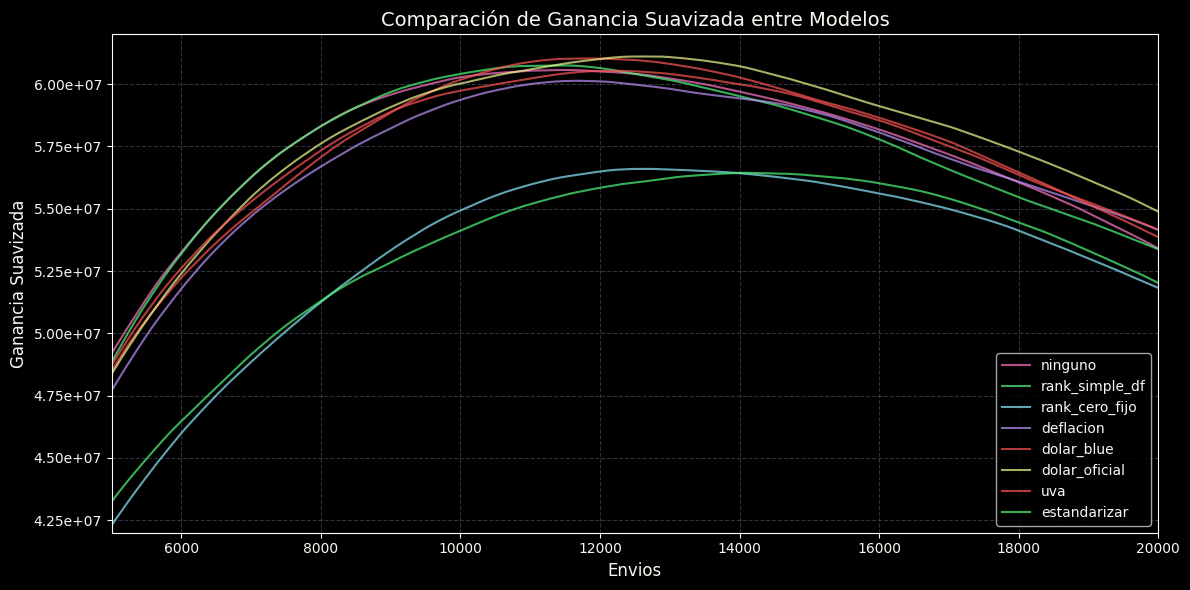

In [254]:
plot_gan_suavizada_comparison(dataframes, envios_range=(5000, 20000), y_range=(4.2e7, 6.2e7))

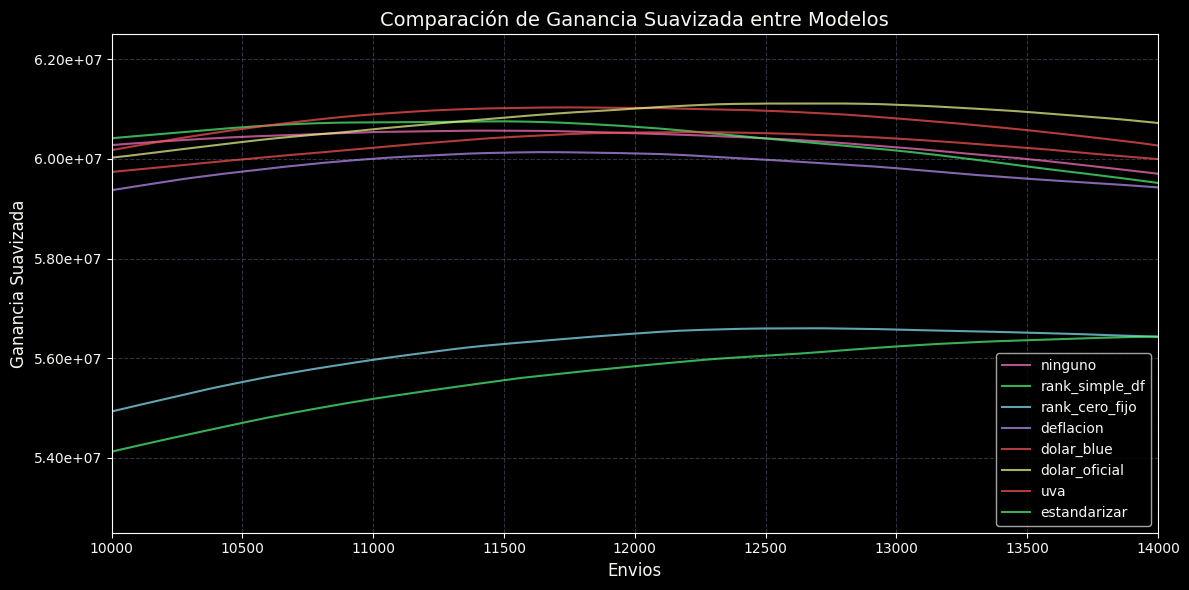

In [256]:
plot_gan_suavizada_comparison(dataframes, envios_range=(10000, 14000), y_range=(5.25e7, 6.25e7))